In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/keras-vggface')

In [ ]:
!pip install face_recognition
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_vggface
!pip install keras_applications
from keras_vggface.vggface import VGGFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=424e68909212b09615b7d856635f7aad7e4be2c0b2b88b0ecb1cba542d182900
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-q7vpnyxf
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-q7vpnyxf
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metad

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#don't run this file
import cv2
import os
import pickle
import numpy as np
from PIL import Image
import face_recognition

import matplotlib.pyplot as plt

headshots_folder_name = '/content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen'

# dimension of images
image_width = 224
image_height = 224

# for detecting faces
# facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# set the directory containing the images
# images_dir = os.path.join(".", headshots_folder_name)
# print(images_dir)

current_id = 0
label_ids = {}

# iterates through all the files in each subdirectories
for root, _, files in os.walk(headshots_folder_name):
    print("files:",files)
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
          # path of the image
          path = os.path.join(root, file)
          print("path:", path)
          # get the label name (name of the person)
          label = os.path.basename(root).replace(" ", ".").lower()
          print("label:", label)

          # add the label (key) and its number (value)
          if not label in label_ids:
              label_ids[label] = current_id
              current_id += 1

          image = face_recognition.load_image_file(path)
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

          # load the image
          # imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
          # image_array = np.array(imgtest, "uint8")

          # get the faces detected in the image
          # faces = facecascade.detectMultiScale(imgtest,
          #     scaleFactor=1.1, minNeighbors=5)
          faces = face_recognition.face_locations(image)

          # if not exactly 1 face is detected, skip this photo
          if len(faces) != 1:
              print(f'---Photo skipped---\n')
              # remove the original image
              os.remove(path)
              continue

          # save the detected face(s) and associate
          # them with the label
          # for (x_, y_, w, h) in faces:

          #     # draw the face detected
          #     face_detect = cv2.rectangle(imgtest,
          #             (x_, y_),
          #             (x_+w, y_+h),
          #             (255, 0, 255), 2)
          #     plt.imshow(face_detect)
          #     plt.show()
          for (y1, x2, y2, x1) in faces:
              # cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 2)
              # cv2.imshow("image:",image)
              # cv2.waitKey(0)
              # resize the detected face to 224x224
              size = (image_width, image_height)

              # # detected face region
              # roi = image_array[y_: y_ + h, x_: x_ + w]
              roi = image[y1:y2, x1:x2]

              # resize the detected head to target size
              resized_image = cv2.resize(roi, size)
              # image_array = np.array(resized_image, "uint8")

              # remove the original image
              os.remove(path)

              # replace the image with only the face
              # im = Image.fromarray(image_array)
              # im.save(path)
              cv2.imwrite(path, resized_image)

files: []
files: ['manh (4).JPG', 'manh (8).JPG', 'manh (9).JPG', 'manh (10).JPG', 'manh (1).JPG', 'manh (2).JPG', 'manh (3).JPG', 'manh (5).JPG', 'manh (6).JPG', 'manh (7).JPG']
files: ['toan (6).JPG', 'toan (1).JPG', 'toan (2).JPG', 'toan (3).JPG', 'toan (4).JPG', 'toan (5).JPG']
files: ['tri (10).jpg', 'tri (4).jpg', 'tri (5).jpg', 'tri (9).jpg', 'tri (7).jpg', 'tri (6).jpg', 'tri (1).jpg', 'tri (2).jpg']
path: /content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen/Tri/tri (10).jpg
label: tri
path: /content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen/Tri/tri (4).jpg
label: tri
path: /content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen/Tri/tri (5).jpg
label: tri
path: /content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen/Tri/tri (9).jpg
label: tri
path: /content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen/Tri/tri (7).jpg
label: tri
path: /content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen/Tri/tri (6).jpg
label: tri
path: /cont

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen',
                target_size=(224,224),
                color_mode='rgb',
                batch_size=32,
                class_mode='categorical',
                shuffle=True)

Found 136 images belonging to 17 classes.


In [ ]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
print(train_generator.class_indices.values())
NO_CLASSES = len(train_generator.class_indices.values())
print(NO_CLASSES)

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
17


In [ ]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='vgg16',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
base_model = VGGFace(include_top=False,
model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers


58909280/58909280 [==============================] - 3s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                      

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)


In [ ]:
# create a new model with the base model's original input and the
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


Epoch 1/20
5/5 [==============================] - 87s 12s/step - loss: 2.7861 - accuracy: 0.1250
Epoch 2/20
5/5 [==============================] - 1s 141ms/step - loss: 2.5168 - accuracy: 0.2941
Epoch 3/20
5/5 [==============================] - 1s 125ms/step - loss: 2.0435 - accuracy: 0.5221
Epoch 4/20
5/5 [==============================] - 1s 145ms/step - loss: 1.5024 - accuracy: 0.6691
Epoch 5/20
5/5 [==============================] - 1s 159ms/step - loss: 1.0323 - accuracy: 0.8162
Epoch 6/20
5/5 [==============================] - 1s 203ms/step - loss: 0.6997 - accuracy: 0.8456
Epoch 7/20
5/5 [==============================] - 1s 141ms/step - loss: 0.4188 - accuracy: 0.9412
Epoch 8/20
5/5 [==============================] - 1s 157ms/step - loss: 0.2355 - accuracy: 0.9779
Epoch 9/20
5/5 [==============================] - 1s 134ms/step - loss: 0.1613 - accuracy: 0.9779
Epoch 10/20
5/5 [==============================] - 1s 128ms/step - loss: 0.0746 - accuracy: 1.0000
Epoch 11/20
5/5 [===

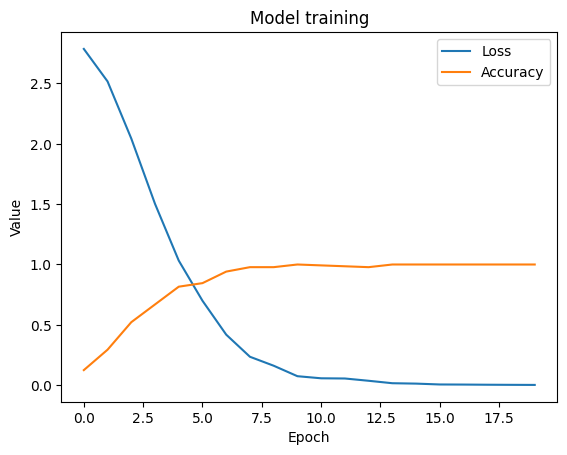

In [ ]:
history = model.fit(train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)

# Vẽ biểu đồ độ lỗi và độ chính xác của mô hình
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model training')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

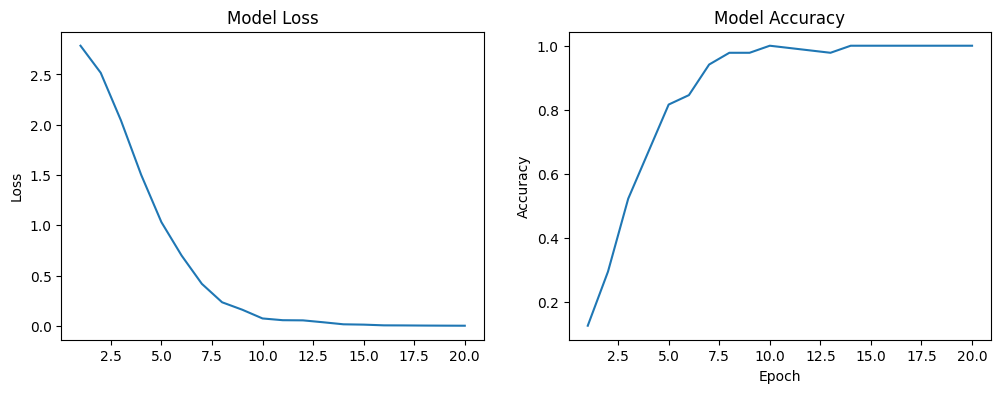

In [ ]:
# Tạo hình ảnh với kích thước tổng thể là 12x4
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 3]})

# Vẽ biểu đồ độ lỗi của mô hình
axs[0].plot(range(1,21,1), history.history['loss'])
axs[0].set_title('Model Loss')
axs[0].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

# Vẽ biểu đồ độ chính xác của mô hình
axs[1].plot(range(1,21,1), history.history['accuracy'])
axs[1].set_title('Model Accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')

plt.show()

In [ ]:
# creates a HDF5 file
model.save(
    'transfer_learning_trained' +
    '_face_cnn_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# deletes the existing model
del model

# returns a compiled model identical to the previous one
model = load_model(
    'transfer_learning_trained' +
    '_face_cnn_model.h5')


In [ ]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)


{0: 'Can', 1: 'Cuong', 2: 'Dat', 3: 'Hung', 4: 'Huy', 5: 'Lich', 6: 'Long', 7: 'Manh', 8: 'Nghia', 9: 'Phuc', 10: 'Quoc', 11: 'Thai', 12: 'Thuan', 13: 'Toan', 14: 'Tri', 15: 'Tu', 16: 'Tung'}


In [ ]:
# save the class dictionary to pickle
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)

In [ ]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras_vggface import utils

# dimension of images
image_width = 224
image_height = 224

# load the training labels
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)

['Can', 'Cuong', 'Dat', 'Hung', 'Huy', 'Lich', 'Long', 'Manh', 'Nghia', 'Phuc', 'Quoc', 'Thai', 'Thuan', 'Toan', 'Tri', 'Tu', 'Tung']


In [ ]:
import tensorflow as tf
import face_recognition
import os
# # for detecting faces
# facecascade = \ cv2.CascadeClassifier(
#     'haarcascade_frontalface_default.xml')

NameGuess = []
NumCorrect = 0
NameCorrect = []
Accurancy = []
count = 0
folder_path = f'/content/drive/MyDrive/Colab Notebooks/keras-vggface/KiemThu'
for file in os.listdir(folder_path):
    print('OK')
    if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):

        test_image_filename = os.path.join(folder_path, file)
        namecorrect = file.split(" ")[0]

        # làm gì đó với file tại đường dẫn file_path
        imagetest = face_recognition.load_image_file(test_image_filename)
        imagetest = cv2.cvtColor(imagetest, cv2.COLOR_BGR2RGB)
        # # load the image
        # imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
        # image_array = np.array(imgtest, "uint8")

        # get the faces detected in the image
        # faces = facecascade.detectMultiScale(imgtest,
        # scaleFactor=1.1, minNeighbors=5)
        faces = face_recognition.face_locations(imagetest)

        # if not exactly 1 face is detected, skip this photo
        if len(faces) == 0:
            print(f'---We need exactly 1 face; photo skipped---')
            continue

        for (y1, x2, y2, x1) in faces:
            # draw the face detected
            # face_detect = cv2.rectangle(
            #     imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
            # plt.imshow(face_detect)
            # plt.show()

            # resize the detected face to 224x224
            size = (image_width, image_height)

            path = "/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir"
            # # detected face region
            # roi = image_array[y_: y_ + h, x_: x_ + w]
            roi = imagetest[y1:y2, x1:x2]
            cv2.imwrite(f"{path}/cuttedImage.jpg", roi)
            # resize the detected head to target size
            resized_image = cv2.resize(roi, size)
            cv2.imwrite(f"{path}/resizedImage.jpg", resized_image)
            # prepare the image for prediction
            x = tf.keras.preprocessing.image.img_to_array(resized_image)
            cv2.imwrite(f"{path}/arrayImage.jpg", x)
            x = np.expand_dims(x, axis=0)  # (224, 224, 3) => (1, 224, 224, 3)
            x = utils.preprocess_input(x, version=1)
            cv2.imwrite(f"{path}/preprocessImage.jpg", x)


            # making prediction
            predicted_prob = model.predict(x)
            print(predicted_prob)
            print(predicted_prob[0].argmax())
            nameguess = class_list[predicted_prob[0].argmax()]
            print("Predicted face: " + nameguess)
            if (nameguess.upper() == namecorrect.upper()):
              print('correct')
              NumCorrect = NumCorrect + 1
              accur = 1 if len(Accurancy)==0 else (Accurancy[-1]*count + 1)/(count+1)
            else:
              print('no')
              accur = 0 if len(Accurancy)==0 else (Accurancy[-1]*count)/(count+1)
            NameGuess.append(nameguess)
            NameCorrect.append(namecorrect)
            Accurancy.append(accur)
            count += 1
        print("------------------------------------------------------------------------------\n")


OK
1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
15
Predicted face: Tu
correct
------------------------------------------------------------------------------

OK
1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
15
Predicted face: Tu
correct
------------------------------------------------------------------------------

OK
1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
14
Predicted face: Tri
correct
------------------------------------------------------------------------------

OK
1/1 [==============================] - 0s 24ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
15
Predicted face: Tu
correct
------------------------------------------------------------------------------

OK
1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
15
Predic

In [ ]:
print("nameCorrect", len(NameCorrect))
print("nameGuess", len(NameGuess))
print("accurancy", len(Accurancy))

for cor, guess in zip(NameCorrect, NameGuess):
  print(cor, guess)

nameCorrect 63
nameGuess 63
accurancy 63
Tu Tu
Tu Tu
Tri Tri
Tu Tu
Tu Tu
Tri Tri
Tri Tri
Tri Tung
Tri Tri
Tri Long
Tri Tri
Tri Lich
Tu Tu
Tri Tri
Tu Tu
Long Long
Long Long
Long Long
Long Long
Long Long
Long Long
Long Long
Phuc Phuc
Tu Tu
Phuc Phuc
Phuc Phuc
Phuc Phuc
Phuc Phuc
Phuc Phuc
Phuc Phuc
Thuan Thuan
Thuan Thuan
Can Can
Can Can
Thuan Thuan
Thai Thai
Thuan Thuan
Thuan Thuan
Can Thai
Thuan Thuan
Thai Thai
Thuan Thuan
Thai Thai
Thai Thai
Thai Phuc
Thai Thai
Thai Thai
Thuan Thuan
Thuan Thuan
Thai Thai
Thuan Thuan
Thuan Thuan
Can Can
Can Can
Can Can
Can Can
Can Can
Can Can
Can Can
Can Can
Can Can
Can Can
Can Can


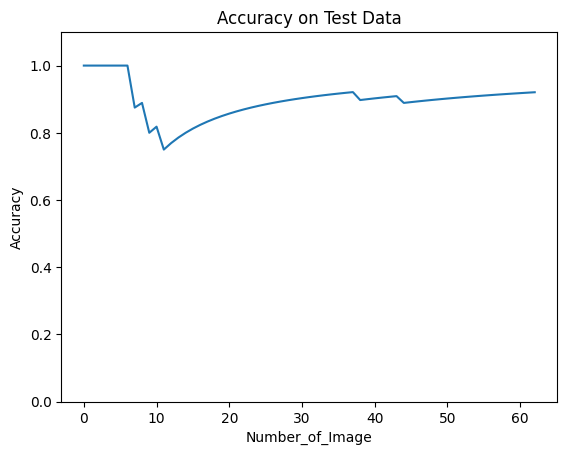

In [ ]:
# Vẽ biểu đồ độ chính xác của mô hình
plt.plot(Accurancy)
plt.ylim([0, 1.1])
plt.title('Accuracy on Test Data')
plt.ylabel('Accuracy')
plt.xlabel('Number_of_Image')

plt.show()

In [ ]:
print(Accurancy[-1])

0.9206349206349206


In [ ]:
print(NumCorrect)

58


In [ ]:
print("accurancy: ", NumCorrect/63)  # 58/60    64/81

accurancy:  0.9206349206349206
